In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../../data/"

figures_folder = "../../Figures/WNT/"

sif_output = "../../sif_files/WNT/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [5]:
df = resources.interactions

In [6]:
df

,source,target,is_directed,is_stimulation,is_inhibition,form_complex,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources
0,A0A024RAD5,SIGNOR-C535,True,False,False,True,False,False,False,miannu,31831667,SIGNOR-272062
1,A0A0B4J2F0,P18848,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261041
2,A0A0B4J2F0,P35638,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261043
3,A0A0B4J2F0,SIGNOR-PH2,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261042
4,A0AVT1,SIGNOR-C496,True,False,False,True,False,False,False,miannu,24816100,SIGNOR-270835
...,...,...,...,...,...,...,...,...,...,...,...,...
28850,URS000075C808_9606,Q6ZN04,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272092
28851,URS000075C808_9606,Q86Y13,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272091
28852,URS000075CF56_9606,P05019,True,False,True,False,False,False,False,miannu,25477897,SIGNOR-255793
28853,URS000075CF56_9606,P23759,True,False,True,False,False,False,False,irozzo,24708856,SIGNOR-256124


In [7]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

In [8]:
filtered_df

,source,target,is_directed,is_stimulation,is_inhibition,form_complex,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources
0,A0A024RAD5,SIGNOR-C535,True,False,False,True,False,False,False,miannu,31831667,SIGNOR-272062
1,A0A0B4J2F0,P18848,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261041
2,A0A0B4J2F0,P35638,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261043
3,A0A0B4J2F0,SIGNOR-PH2,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261042
4,A0AVT1,SIGNOR-C496,True,False,False,True,False,False,False,miannu,24816100,SIGNOR-270835
...,...,...,...,...,...,...,...,...,...,...,...,...
28850,URS000075C808_9606,Q6ZN04,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272092
28851,URS000075C808_9606,Q86Y13,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272091
28852,URS000075CF56_9606,P05019,True,False,True,False,False,False,False,miannu,25477897,SIGNOR-255793
28853,URS000075CF56_9606,P23759,True,False,True,False,False,False,False,irozzo,24708856,SIGNOR-256124


Loading the data from Antoine

In [9]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [10]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_18202/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [11]:
wnt_list = top_genes_per_group[top_genes_per_group["Group"] == "WNT"]["Gene"].reset_index(drop=True).to_list()

In [12]:
wnt_list

['ZFPM2',
 'GALNT14',
 'LRIG3',
 'ZIC2',
 'FAM174B',
 'RAI2',
 'APCDD1',
 'TAL2',
 'ZIC5',
 'RBP1',
 'DSC2',
 'EVC2',
 'KCTD17',
 'ZMAT4',
 'RTKN',
 'RASL11B',
 'LHX8',
 'SP5',
 'EMID1',
 'MEIS1',
 'GGACT',
 'SLC24A2',
 'CDKN1C',
 'HOXC5',
 'PRMT8',
 'HRASLS5',
 'NRTN',
 'EVC',
 'MFNG',
 'PDGFC',
 'GAP43',
 'FBXL7',
 'HOXD4',
 'DSP',
 'PCSK1',
 'HS3ST1',
 'HUNK',
 'EOGT',
 'HECW1',
 'GXYLT2',
 'NKD2',
 'BMP7',
 'VRK2',
 'C18orf42',
 'TOM1L1',
 'LRRC55',
 'SYT1',
 'SYT2',
 'PLXDC1',
 'IL17D']

# Creating a Network starting from All Omnipath interactions

In [13]:
wnt_net = Network(wnt_list, resources = filtered_df)

Error: node GALNT14 is not present in the resources database
Error: node FAM174B is not present in the resources database
Error: node RAI2 is not present in the resources database
Error: node APCDD1 is not present in the resources database
Error: node ZIC5 is not present in the resources database
Error: node RBP1 is not present in the resources database
Error: node DSC2 is not present in the resources database
Error: node EVC2 is not present in the resources database
Error: node ZMAT4 is not present in the resources database
Error: node RASL11B is not present in the resources database
Error: node SP5 is not present in the resources database
Error: node EMID1 is not present in the resources database
Error: node GGACT is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node PRMT8 is not present in the resources database
Error: node HRASLS5 is not present in the resources database
Error: node EVC is not present in the resources databa

Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [14]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,LRIG3,Q6UXM1,NaN
2,ZIC2,O95409,NaN
3,TAL2,Q16559,NaN
4,KCTD17,Q8N5Z5,NaN
5,RTKN,Q9BST9,NaN
6,LHX8,Q68G74,NaN
7,MEIS1,O00470,NaN
8,SLC24A2,Q9UI40,NaN
9,CDKN1C,P49918,NaN


In [15]:
%%time
wnt_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

CPU times: user 6.21 s, sys: 941 µs, total: 6.21 s
Wall time: 6.21 s


In [16]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,LRIG3,Q6UXM1,NaN
2,ZIC2,O95409,NaN
3,TAL2,Q16559,NaN
4,KCTD17,Q8N5Z5,NaN
...,...,...,...
95,PTEN,P60484,NaN
96,ACVR2B,Q13705,NaN
97,SMAD2,Q15796,NaN
98,CRTC2,Q53ET0,NaN


In [17]:
wnt_net.edges

,source,target,Type,Effect,References
0,Q6UXM1,Q15303,None,stimulation,23723069; 23723069
1,Q15303,P42229,None,stimulation,16729043; 16729043
2,P42229,Q9Y6K1,None,stimulation,26059451; 26059451
3,Q9Y6K1,O00470,None,inhibition,28288143; 28288143
4,P42229,URS000062749E_9606,None,stimulation,23132946; 23132946
...,...,...,...,...,...
347,Q6UB99,P04637,None,stimulation,18840648
348,Q9H2X6,P04637,None,stimulation,17210684
349,O75676,P04637,None,inhibition,19797274
350,O15111,O14920,None,stimulation,10022904


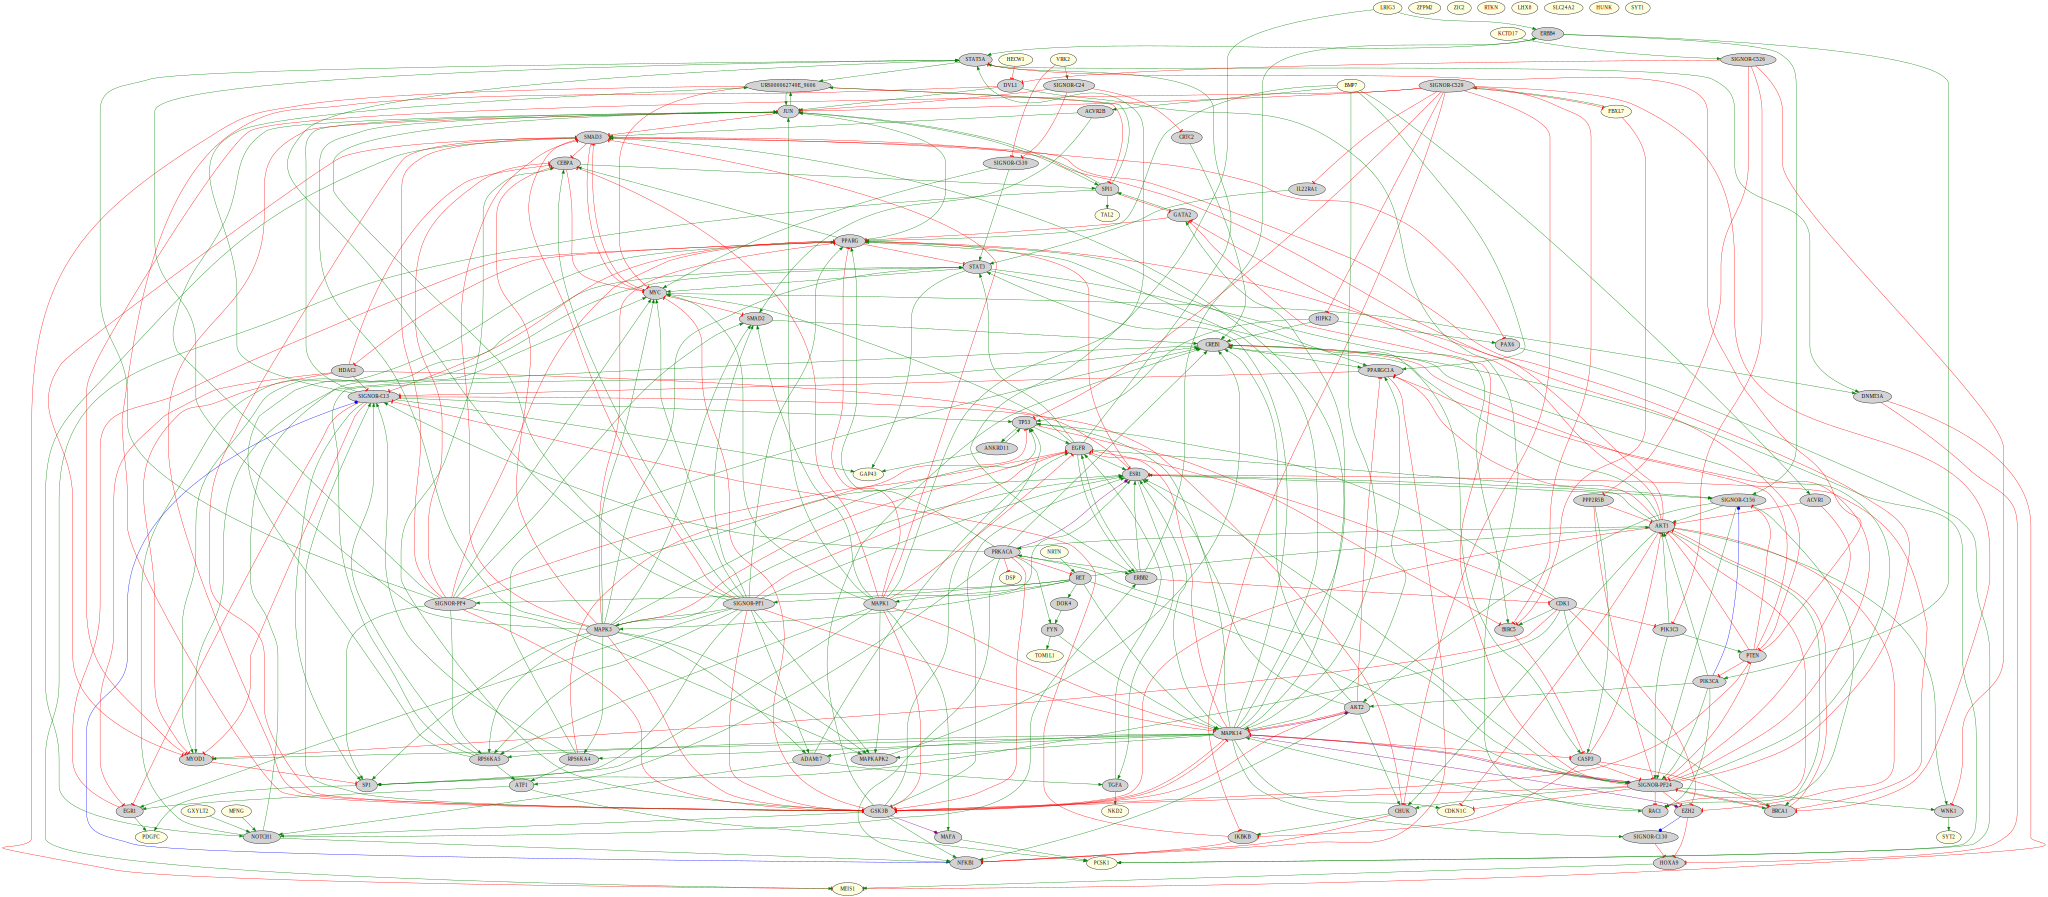

In [18]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_signor_Lin"
wnt_visualizer.render(output_file=output)

# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [19]:
from neko._outputs.exports import Exports

In [20]:
for node in wnt_net.nodes["Uniprot"]:
    if node not in wnt_net.edges["source"].values and node not in wnt_net.edges["target"].values:
        node = wnt_net.nodes[ wnt_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        wnt_net.remove_node(node[0])

['ZFPM2']
['ZIC2']
['RTKN']
['LHX8']
['SLC24A2']
['HUNK']
['SYT1']


In [21]:
export = Exports(wnt_net)

In [22]:
export.export_sif(sif_output + "WNT_signor_Lin.sif")